In [159]:
import numpy as np 
import pandas as pd 

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [160]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [161]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [162]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [163]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Sheikh\AppData\Local\Temp\ipykernel_14208\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [164]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [165]:
X_train = df.drop(['Survived'], axis=1)
y_train = df['Survived']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

C:\Users\Sheikh\AppData\Local\Temp\ipykernel_14208\1231097352.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


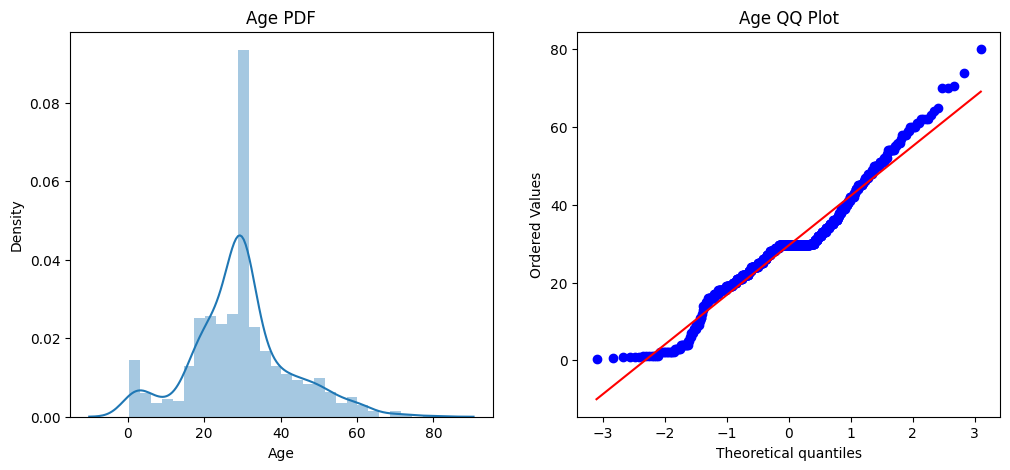

In [167]:
# PDF vs QQ plot
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Sheikh\AppData\Local\Temp\ipykernel_14208\2640549072.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


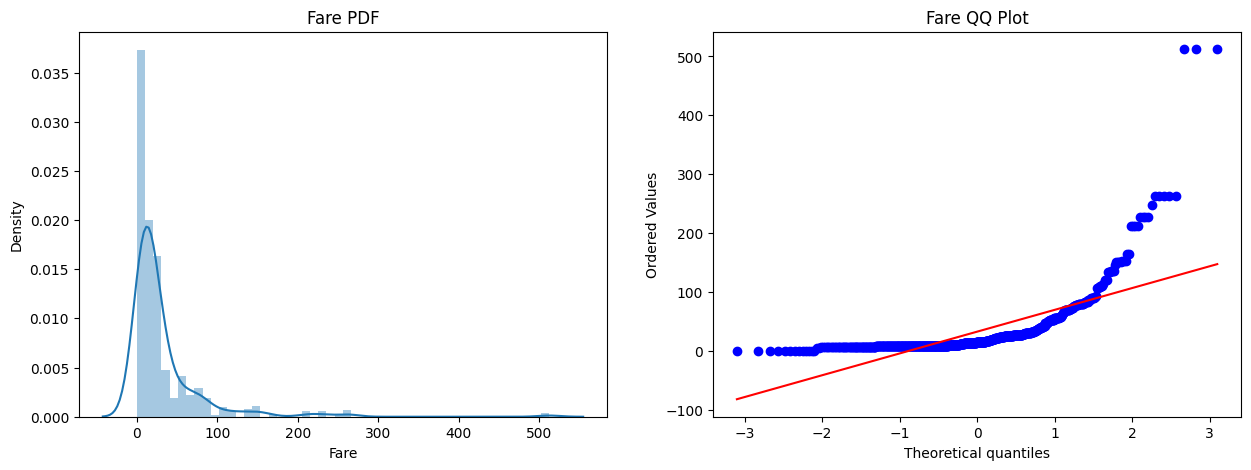

In [168]:
# PDF vs QQ plot
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [169]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [170]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [171]:
y_pred_lr = lr.predict(X_test)
y_pred_dtc = dtc.predict(X_test)

In [172]:
print('Accuracy LR ', accuracy_score(y_test, y_pred_lr))
print('Accuracy DTC ', accuracy_score(y_test, y_pred_dtc))

Accuracy LR  0.6480446927374302
Accuracy DTC  0.6815642458100558


Function Transformer 

In [173]:
trf = FunctionTransformer(func=np.log1p)

In [174]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [175]:
tlr = LogisticRegression()
tlr.fit(X_train_transformed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [176]:
tdtc = DecisionTreeClassifier()
tdtc.fit(X_train_transformed, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [177]:
tlr_ypred = tlr.predict(X_test)
tdtc_ypred = tdtc.predict(X_test)

In [178]:
print('Accuracy TLR ', accuracy_score(y_test, tlr_ypred))
print('Accuracy TDTC ', accuracy_score(y_test, tdtc_ypred))

Accuracy TLR  0.7374301675977654
Accuracy TDTC  0.5865921787709497


In [179]:
X_transformed = trf.fit_transform(X_train)

In [180]:
lr1 = LogisticRegression()
dtc1 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(lr1, X_transformed, y_train, scoring='accuracy', cv=10)))
print('DTC', np.mean(cross_val_score(dtc1, X_transformed, y_train, scoring='accuracy', cv=10)))

LR 0.6783646322378717
DTC 0.6164906103286386


Text(0.5, 1.0, 'Fare after Log')

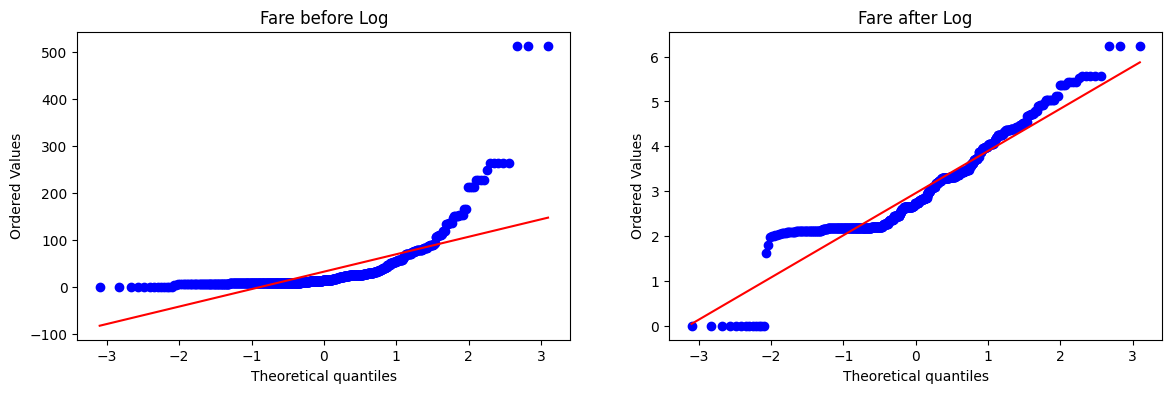

In [181]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after Log')


Text(0.5, 1.0, 'Age after Log')

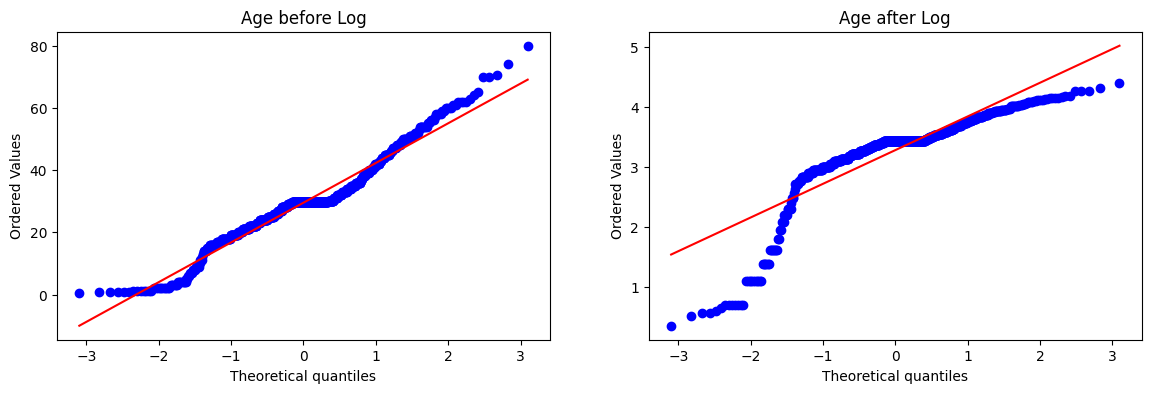

In [182]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age after Log')